<a href="https://colab.research.google.com/github/mikeamerenda/mikeamerenda/blob/main/Linear_Regression_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of 0.5 or greater with price.   We will limit our analysis to these three features.

In [4]:
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


In [5]:
df.corr().sort_values(by = ['PRICE'])

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


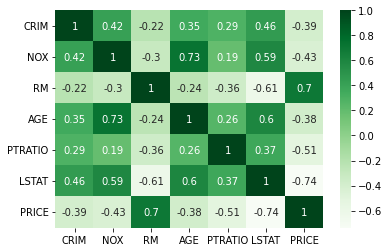

In [6]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).

In [7]:
# Creating Feature Matris with RM, LSTAT, and PTRATIO
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [8]:
#  Selecting Price as the Vector
y = df.loc[:, 'PRICE'].values

3) Split your data into train and test groups. Please use random number 42 for consistency!



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
len(X_train)

379

In [11]:
len(X_test)

127

In [12]:
len(y_train)

379

In [13]:
len(y_test)

127

4) Instantiate your model and fit it on the training set.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

In [17]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6877966145058925


In [18]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6331590458194674


train and test scores were similar which means that our model was not overfit

6) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars. 

In [19]:
preds = reg.predict(X)

In [20]:
np.sqrt(mean_squared_error(y, preds))

5.213950943448578

On average, our model is incorrect by about 5.21 Thousand dolloars